In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos-dataset/final_unbalanced.csv
/kaggle/input/ddos-dataset/final_balanced.csv


In [2]:
df = pd.read_csv('/kaggle/input/ddos-dataset/final_unbalanced.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211912 entries, 0 to 1211911
Data columns (total 72 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1211912 non-null  int64  
 1   Flow ID            1211912 non-null  object 
 2   Src IP             1211912 non-null  object 
 3   Src Port           1211912 non-null  int64  
 4   Dst IP             1211912 non-null  object 
 5   Dst Port           1211912 non-null  int64  
 6   Protocol           1211912 non-null  int64  
 7   Timestamp          1211912 non-null  object 
 8   Flow Duration      1211912 non-null  int64  
 9   Tot Fwd Pkts       1211912 non-null  int64  
 10  Tot Bwd Pkts       1211912 non-null  int64  
 11  TotLen Fwd Pkts    1211912 non-null  float64
 12  TotLen Bwd Pkts    1211912 non-null  float64
 13  Fwd Pkt Len Max    1211912 non-null  float64
 14  Fwd Pkt Len Min    1211912 non-null  float64
 15  Fwd Pkt Len Mean   1211912 non-n

# Random Forest (7/3) Unbalanced Dataset

In [3]:
# Encoded the categorical, object variables
from sklearn import preprocessing

for f in df.columns:
    if df[f].dtype == "object":
        label = preprocessing.LabelEncoder()
        label.fit(list(df[f].values))
        df[f] = label.transform(list(df[f].values))

In [4]:
df = df.astype(float)

In [5]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,690035.0,480872.0,21050.0,52201.0,4656.0,3389.0,6.0,54164.0,4544883.0,12.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2702781.0,193349.0,5011.0,57165.0,4604.0,53.0,17.0,55597.0,353.0,1.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6540559.0,625965.0,5119.0,51340.0,10969.0,443.0,6.0,47259.0,5206057.0,6.0,...,20.0,136669.0,0.0,136669.0,136669.0,5069365.0,0.0,5069365.0,5069365.0,0.0
3,138035.0,20507.0,8627.0,60389.0,3664.0,80.0,6.0,6795.0,5688954.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7653122.0,611718.0,5105.0,3389.0,6274.0,20750.0,6.0,37337.0,82717004.0,2.0,...,20.0,0.0,0.0,0.0,0.0,82717010.0,0.0,82717010.0,82717010.0,0.0


In [6]:
df.isna().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 72, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 72, dtype: int64

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211912 entries, 0 to 1211911
Data columns (total 71 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow ID            1211912 non-null  float64
 1   Src IP             1211912 non-null  float64
 2   Src Port           1211912 non-null  float64
 3   Dst IP             1211912 non-null  float64
 4   Dst Port           1211912 non-null  float64
 5   Protocol           1211912 non-null  float64
 6   Timestamp          1211912 non-null  float64
 7   Flow Duration      1211912 non-null  float64
 8   Tot Fwd Pkts       1211912 non-null  float64
 9   Tot Bwd Pkts       1211912 non-null  float64
 10  TotLen Fwd Pkts    1211912 non-null  float64
 11  TotLen Bwd Pkts    1211912 non-null  float64
 12  Fwd Pkt Len Max    1211912 non-null  float64
 13  Fwd Pkt Len Min    1211912 non-null  float64
 14  Fwd Pkt Len Mean   1211912 non-null  float64
 15  Fwd Pkt Len Std    1211912 non-n

## Split data into train set and test set (7/3)

In [10]:
# Take features and target variables
y = df['Label']
X = df.drop(['Label'], axis=1, inplace=False)

print(X.shape)
print(y.shape)

(1211912, 70)
(1211912,)


In [11]:
TEST_SIZE = 0.3
RANDOM_STATE = 42

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(848338, 70)
(848338,)
(363574, 70)
(363574,)


## Define grid search and train model, find best match`

In [12]:
# Define grid search parameters for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

CROSS_VALIDATION = 3
VERBOSE = 4

rf = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid = {
    "n_estimators": [50, 100],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5],
#     "max_leaf_nodes": [2, 4],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=CROSS_VALIDATION,  # 3-fold cross-validation
    n_jobs=-1,  # Use all cores
    verbose=VERBOSE,  # Prints progress of the GridSearchCV process
    return_train_score=True,
)

In [13]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=4)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy Score:", best_score)

### Prediction with best model

In [15]:
# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

In [16]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

### Evaluation

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [18]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990180816009946
F1-score: 0.9972853568957257
Precision score: 1.0
Recall score: 0.9945854124641682
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    297641
         1.0       1.00      0.99      1.00     65933

    accuracy                           1.00    363574
   macro avg       1.00      1.00      1.00    363574
weighted avg       1.00      1.00      1.00    363574



### Calculate the samples where the model predicts incorrectly compared to the actual label

In [19]:
misclassified_samples = X_test[y_test != y_pred]
mc = misclassified_samples.shape[0]
print("Misclassified samples number:", mc)

Misclassified samples number: 357


## Heatmap for GridSearch

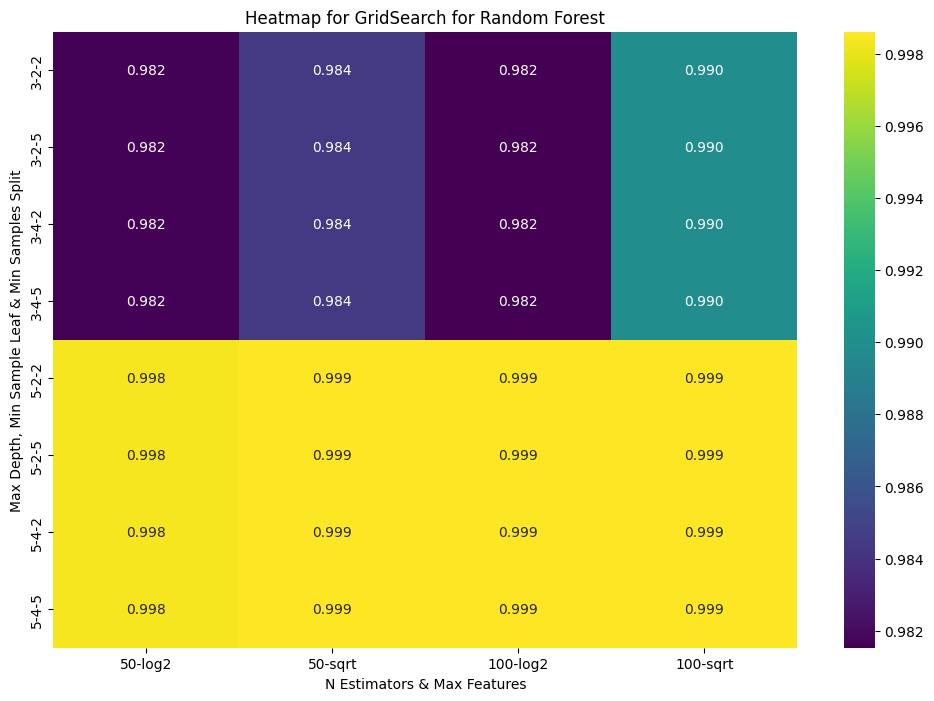

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)

# Choose important columns
important_columns = ['mean_test_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_min_samples_split']

filtered_results = results[important_columns]

pivot_table = filtered_results.pivot_table(
    values='mean_test_score',
    index=['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split'],
    columns=['param_n_estimators', 'param_max_features']
)

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Heatmap for GridSearch for Random Forest')
plt.xlabel('N Estimators & Max Features')
plt.ylabel('Max Depth, Min Sample Leaf & Min Samples Split')
plt.show()

### LineChart for GridSearch

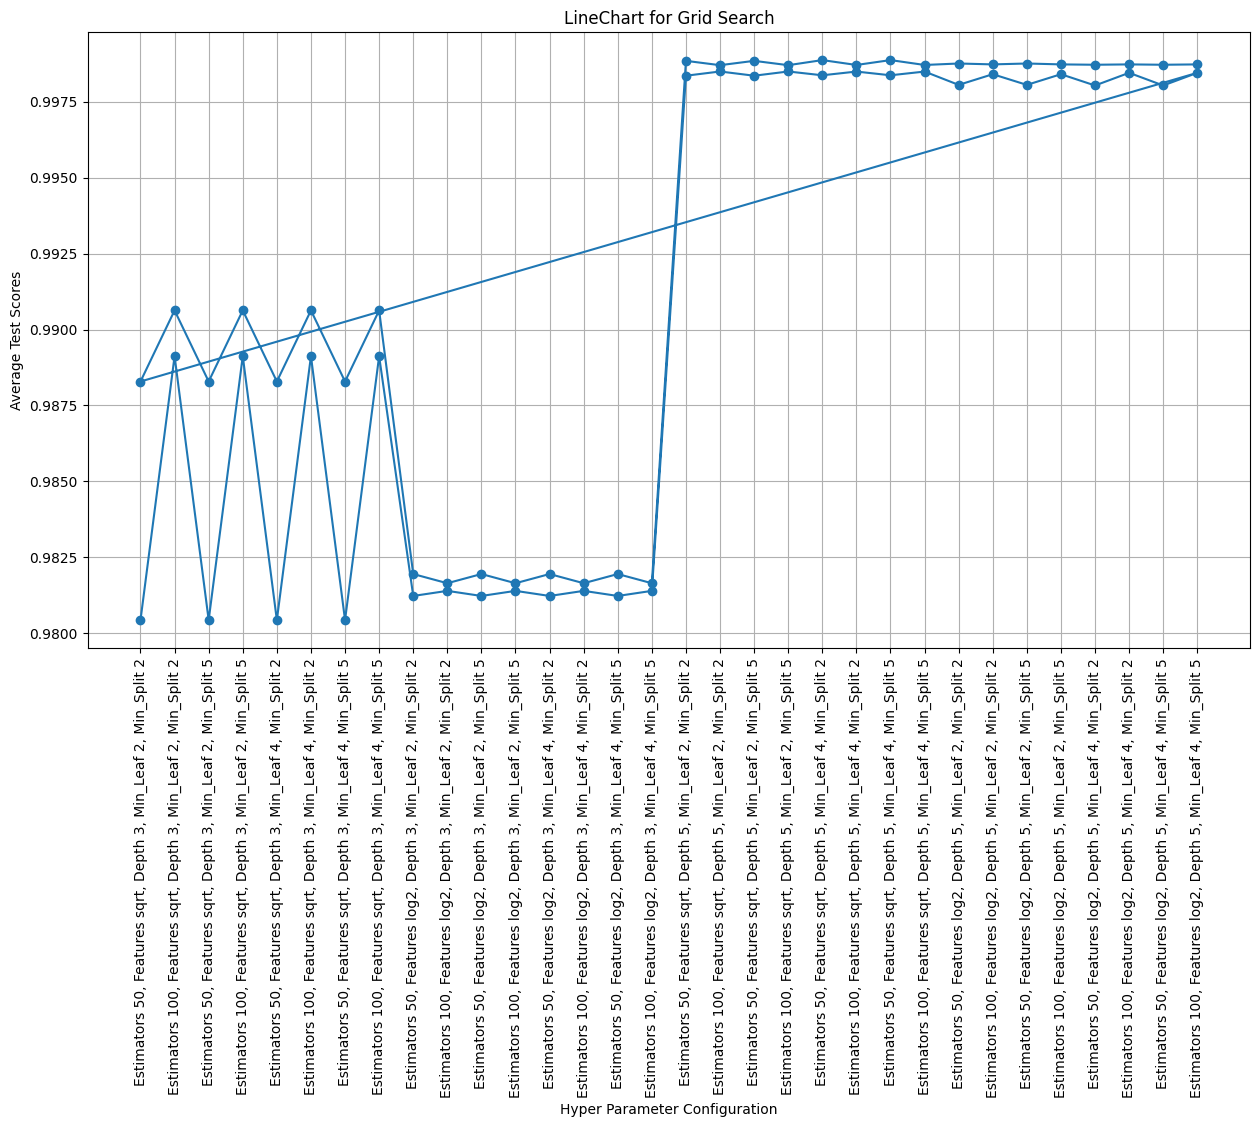

In [21]:
results = pd.DataFrame(grid_search.cv_results_)

results['case'] = results.apply(
    lambda row: f"Estimators {row['param_n_estimators']}, Features {row['param_max_features']}, Depth {row['param_max_depth']}, Min_Leaf {row['param_min_samples_leaf']}, Min_Split {row['param_min_samples_split']}",
    axis=1
)

plt.figure(figsize=(15, 8))
plt.plot(results['case'], results['mean_test_score'], marker='o')

# Put all tag on X line
plt.xticks(rotation=90)

plt.title('LineChart for Grid Search')
plt.xlabel('Hyper Parameter Configuration')
plt.ylabel('Average Test Scores')
plt.grid(True)
plt.show()

### Draw Decision Tree

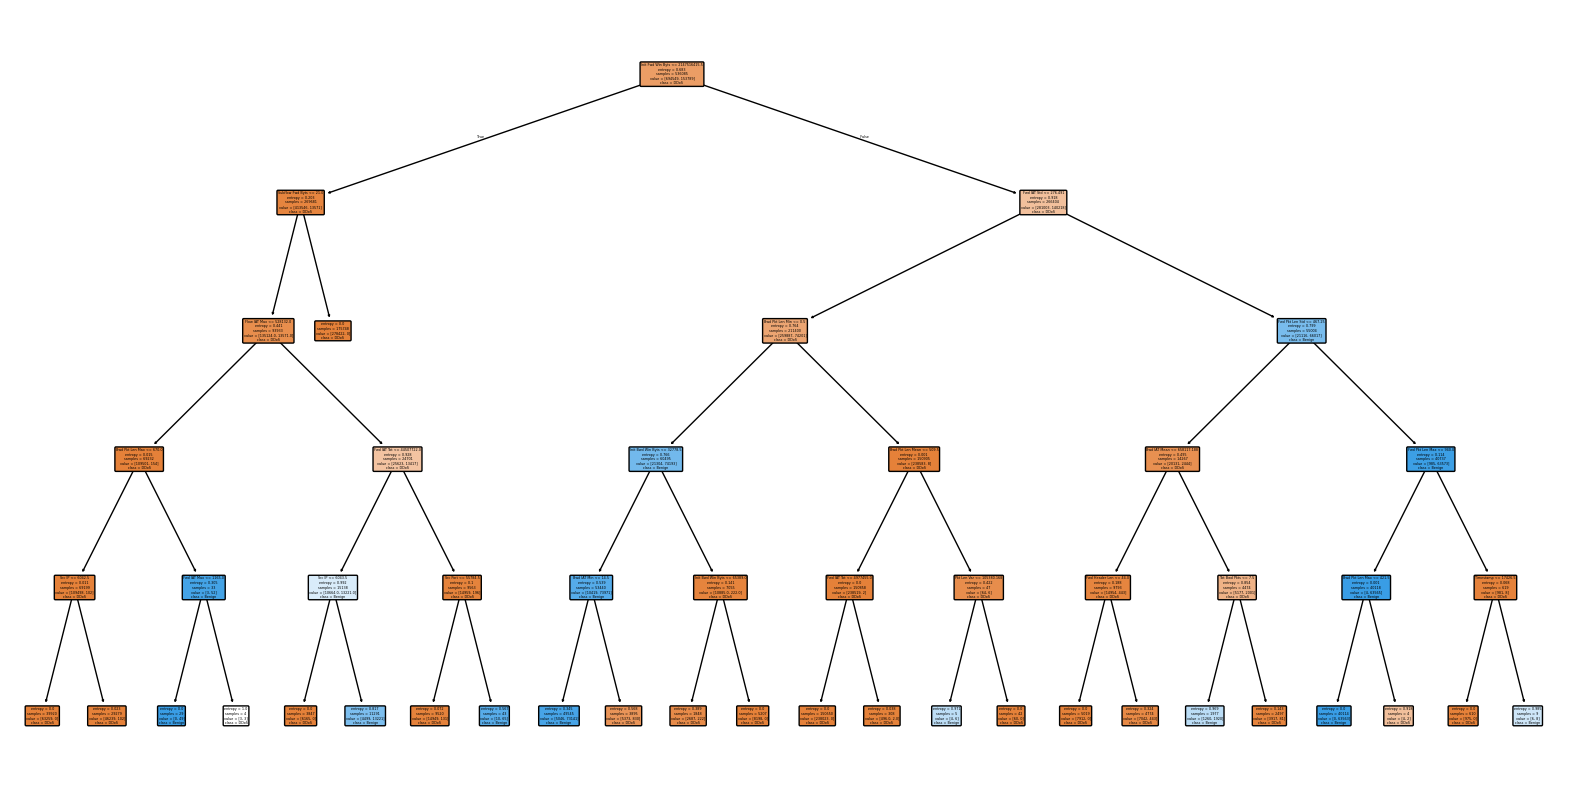

In [22]:
from sklearn import tree
tree_index = 0  # chọn cây đầu tiên
chosen_tree = best_rf.estimators_[tree_index]

# Vẽ cây quyết định
plt.figure(figsize=(20,10))
tree.plot_tree(chosen_tree,
               filled=True,
               rounded=True,
               class_names=["DDoS", "Benign"],
               feature_names=X.columns)
plt.show()

### Confusion Maxtrix

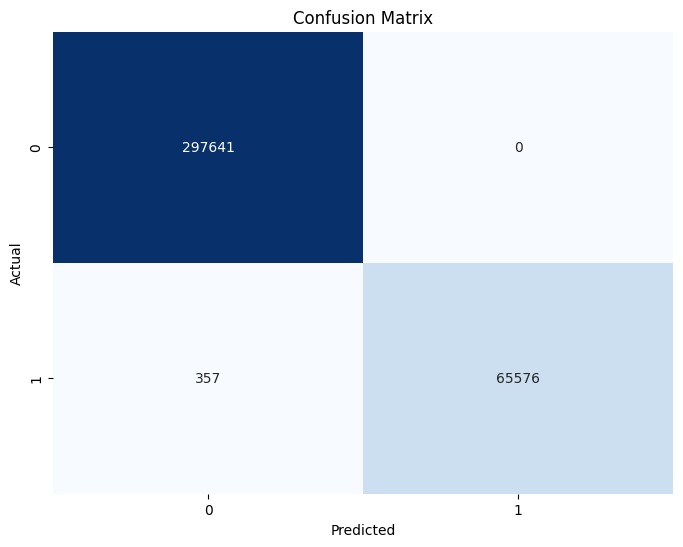

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC

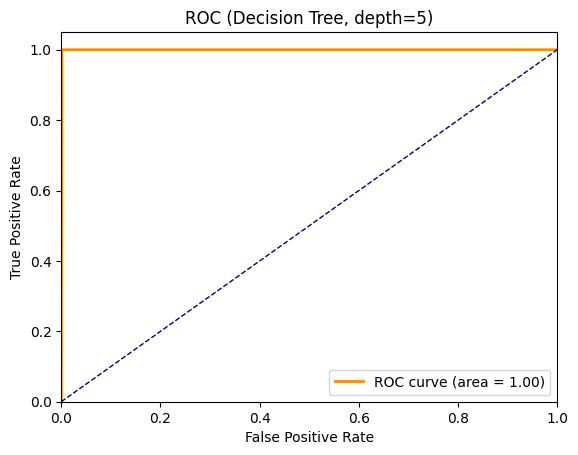

[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.998, test=0.998) total time= 1.5min
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.982, test=0.982) total time= 1.5min
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.998) total time= 1.9min
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.982, test=0.982) total time= 1.1min
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.998, test=0.999) total time= 1.8min
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.9

In [24]:
# Vẽ đường cong ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Decision Tree, depth=5)')
plt.legend(loc="lower right")
plt.show()